In [168]:
import numpy as np
import pandas as pd
import os

In [169]:
data_folder = '../data/routes_short_2023-06-06|18:33:36/' #916 95% Route Finish Threshold

criterion_header = ["RouteCompletionTest",   
                    "RouteCompletionTest_figure",
                    "OutsideRouteLanesTest", 
                    "OutsideRouteLanesTest_figure",
                    "CollisionTest",         
                    "CollisionTest_figure",
                    "RunningRedLightTest",   
                    "RunningRedLightTest_figure",
                    "RunningStopTest",       
                    "RunningStopTest_figure",
                    "InRouteTest", 
                    "InRouteTest_figure",          
                    "AgentBlockedTest",
                    "AgentBlockedTest_figure",      
                    "Timeout"]

criterion_bool_head = ["RouteCompletionTest",   
                        "OutsideRouteLanesTest", 
                        "CollisionTest",         
                        # "RunningRedLightTest",   
                        # "RunningStopTest",       
                        # "InRouteTest", 
                        # "AgentBlockedTest",
                        "Timeout"]

scenario_header = ["cloudiness",
                   "precipitation",
                   "precipitation_deposits",
                   "wind_intensity",
                   "sun_azimuth_angle",
                   "sun_altitude_angle",
                   "fog_density",
                   "wetness",
                   "fog_falloff",
                   "vehicle_infront", 
                   "vehicle_opposite", 
                   "vehicle_side",
                   "start_offset",
                   "end_offset"]

select_criterions = ["RouteCompletionTest", 
                     "CollisionTest", 
                     "OutsideRouteLanesTest", 
                     "Timeout"] 

# ╒═════╤══════════════════════════════════════╕
# │ DOL │ Distance out of the Lane             │
# ├─────┼──────────────────────────────────────┤
# │ DVE │ Minimum Distance from other Vehicle  │
# ├─────┼──────────────────────────────────────┤
# │ DPD │ Minimum Distance from Pedestrians    │
# ├─────┼──────────────────────────────────────┤
# │ DSM │ Minimum Distance from static Mesh    │
# ├─────┼──────────────────────────────────────┤
# │ DFD │ Distance away from Final Destination │
# ╘═════╧══════════════════════════════════════╛
fitness_header = ["DOL","DVE","DPD","DSM","DFD"]


In [170]:
criterions = pd.read_csv(data_folder+'criterion.csv',names=criterion_header)
scenarios  = pd.read_csv(data_folder+'scenario.csv',names=scenario_header)
fitnesses  = pd.read_csv(data_folder+'fitness.csv',names=fitness_header)

print(criterions.shape)
print(scenarios.shape)
print(fitnesses.shape)


(912, 15)
(912, 14)
(912, 5)


## CollisionTest

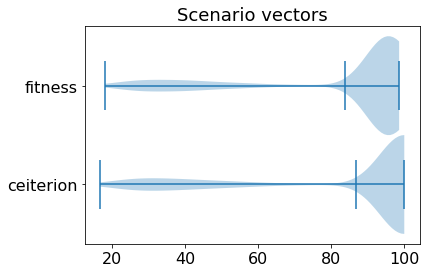

In [133]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
plt.violinplot([criterions['RouteCompletionTest_figure'], (1-fitnesses['DFD'])*100], vert=False, showmeans=True, widths=1)
plt.yticks(range(1, 3), ['ceiterion','fitness'],fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.show()


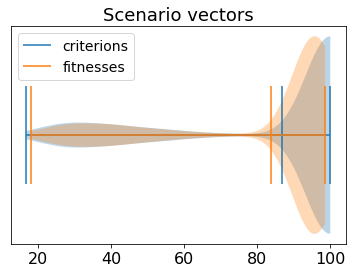

In [134]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(criterions['RouteCompletionTest_figure'], vert=False, showmeans=True, widths=1)
vl2 = plt.violinplot((1-fitnesses['DFD'])*100, vert=False, showmeans=True, widths=1)
plt.yticks(range(1), [''],fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=['criterions','fitnesses'],fontsize=14,loc=2)
plt.show()

We can use DFD or RouteCompletionTest_figure to replace RouteCompletion.
Different calculation method

RouteCompletionTest_figure is a better choice as it is from (0,1)  
1 means success, 0 means fail

## OutsideRouteLanesTest

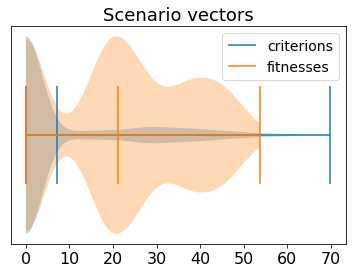

In [135]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(criterions['OutsideRouteLanesTest_figure'], vert=False, showmeans=True, widths=1)
# vl2 = plt.violinplot(criterions[criterions['OutsideRouteLanesTest']==1]['OutsideRouteLanesTest_figure'], vert=False, showmeans=True, widths=1)
vl2 = plt.violinplot((fitnesses['DOL'])*100, vert=False, showmeans=True, widths=1)
plt.yticks(range(1), [''],fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=['criterions','fitnesses'],fontsize=14)
plt.show()

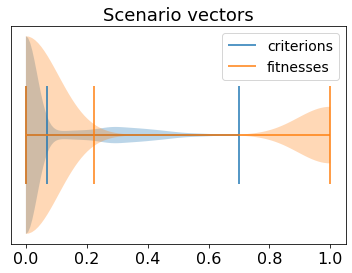

In [141]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10,10))
vl1 = plt.violinplot(criterions['OutsideRouteLanesTest_figure']/100, vert=False, showmeans=True, widths=1)
vl2 = plt.violinplot(criterions['OutsideRouteLanesTest'], vert=False, showmeans=True, widths=1)
plt.yticks(range(1), [''],fontsize=16)
plt.xticks(fontsize=16)
plt.title("Scenario vectors", fontsize=18)
plt.legend(handles=(vl1['cbars'],vl2['cbars']), labels=['criterions','fitnesses'],fontsize=14)
plt.show()

(array([ 1.,  5., 16., 20., 18., 35., 31., 26., 20., 13.,  8.,  6.,  3.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <BarContainer object of 20 artists>)

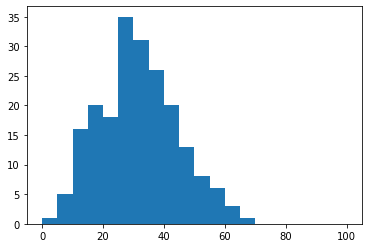

In [152]:
plt.hist(criterions[criterions['OutsideRouteLanesTest']==1]['OutsideRouteLanesTest_figure'],bins=np.arange(0,101,5))

(array([709.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100]),
 <BarContainer object of 20 artists>)

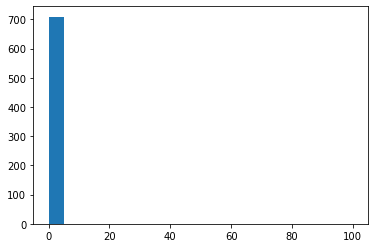

In [153]:
plt.hist(criterions[criterions['OutsideRouteLanesTest']==0]['OutsideRouteLanesTest_figure'],bins=np.arange(0,101,5))


The calculation of fitness is wrong  
criterion should be used at here

0 means success, 1 means fail

## Collision

(array([12.,  8., 14.,  6.,  5.,  6.,  5.,  6.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9]),
 <BarContainer object of 39 artists>)

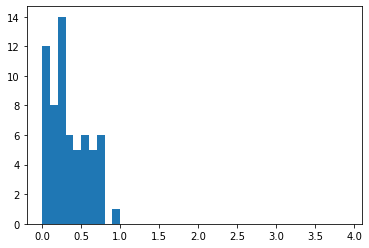

In [172]:
plt.hist(fitnesses[criterions['CollisionTest']==1]['DVE'],bins=np.arange(0,4,0.1))

(array([ 3.,  6., 11., 22., 39., 45., 32., 36., 35., 40., 21., 20., 18.,
        16., 15., 21., 15., 27., 23., 25., 52., 44., 49., 28., 16., 12.,
        24., 10., 16., 10.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9]),
 <BarContainer object of 39 artists>)

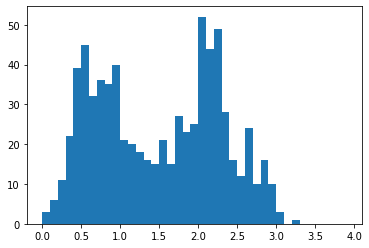

In [173]:
plt.hist(fitnesses[criterions['CollisionTest']==0]['DVE'],bins=np.arange(0,4,0.1))

In [174]:
fitnesses.loc[fitnesses['DVE'] > 2, 'DVE'] = 2
fitnesses['DVE'] = fitnesses['DVE']/2
fitnesses.loc[criterions['CollisionTest']==1,'DVE'] = 0

(array([ 66.,   6.,  11.,  22.,  39.,  45.,  32.,  36.,  35.,  40.,  21.,
         20.,  18.,  16.,  15.,  21.,  15.,  27.,  23., 404.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

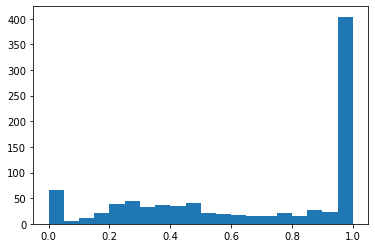

In [176]:
plt.hist(fitnesses['DVE'],bins=np.arange(0,1.05,0.05))


collection can use modified DVE  
`0 if criterions['CollisionTest']==1 else min(fitnesses['DVE'],2)/2`
0 is fail, 1 is success

The width of lane is set as 3.5m  
The width of vehicle is set as 1.6  
Thus the safe distance is set as 3.5-1.6=1.9  
To calculate quick, I round it as 2.0